# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [3]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_MicrosoftCopilot_1.csv")
df.head()

,userName,score,at,content
0,Raul Mansyah,5,2024-07-30 11:17:36,Luarbiasa
1,Riolasanjata,5,2024-07-30 06:27:36,aplikasinya sangat bagus. pokoknya kalian haru...
2,tsabit ida,5,2024-07-29 12:55:39,"aplikasi ai terbaik menurut saya, kenapa kok t..."
3,AZMI HASYIM,5,2024-07-29 09:05:00,sangat bagus dan aku ngomong terimakasih aja d...
4,Muhamad Syafruddin,5,2024-07-29 01:29:35,ok


In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Luarbiasa
1,aplikasinya sangat bagus. pokoknya kalian haru...
2,"aplikasi ai terbaik menurut saya, kenapa kok t..."
3,sangat bagus dan aku ngomong terimakasih aja d...
4,ok
...,...
671,Lebih mirip Chat GPT ketimbang pendahulunya bi...
672,Mantap sih udah meluncur di android 🤩
673,Asisten digital terbaik yang didukung oleh AI ...
674,"Sejauh yang coba di Bing dan Edge, copilot san..."


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  676 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,676
unique,534
top,good
freq,22


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(676, 1)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(534, 1)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,Luarbiasa,luarbiasa
1,aplikasinya sangat bagus. pokoknya kalian haru...,aplikasinya sangat bagus pokoknya kalian harus...
2,"aplikasi ai terbaik menurut saya, kenapa kok t...",aplikasi ai terbaik menurut saya kenapa kok te...
3,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...
4,ok,ok
...,...,...
671,Lebih mirip Chat GPT ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...
672,Mantap sih udah meluncur di android 🤩,mantap sih udah meluncur di android
673,Asisten digital terbaik yang didukung oleh AI ...,asisten digital terbaik yang didukung oleh ai ...
674,"Sejauh yang coba di Bing dan Edge, copilot san...",sejauh yang coba di bing dan edge copilot sang...


# **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Luarbiasa,luarbiasa,luarbiasa
1,aplikasinya sangat bagus. pokoknya kalian haru...,aplikasinya sangat bagus pokoknya kalian harus...,aplikasinya sangat bagus pokoknya kalian harus...
2,"aplikasi ai terbaik menurut saya, kenapa kok t...",aplikasi ai terbaik menurut saya kenapa kok te...,aplikasi ai terbaik menurut saya kenapa kok te...
3,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...
4,ok,ok,ok
...,...,...,...
671,Lebih mirip Chat GPT ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...
672,Mantap sih udah meluncur di android 🤩,mantap sih udah meluncur di android,mantap sih udah meluncur di android
673,Asisten digital terbaik yang didukung oleh AI ...,asisten digital terbaik yang didukung oleh ai ...,asisten digital terbaik yang didukung oleh ai ...
674,"Sejauh yang coba di Bing dan Edge, copilot san...",sejauh yang coba di bing dan edge copilot sang...,sejauh yang coba di bing dan edge copilot sang...


# **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.4 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Luarbiasa,luarbiasa,luarbiasa,luarbiasa
1,aplikasinya sangat bagus. pokoknya kalian haru...,aplikasinya sangat bagus pokoknya kalian harus...,aplikasinya sangat bagus pokoknya kalian harus...,aplikasinya bagus pokoknya harus coba download...
2,"aplikasi ai terbaik menurut saya, kenapa kok t...",aplikasi ai terbaik menurut saya kenapa kok te...,aplikasi ai terbaik menurut saya kenapa kok te...,aplikasi ai terbaik menurut kenapa kok terbaik...
3,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...,bagus aku ngomong terimakasih aja jawab terima...
4,ok,ok,ok,ok
...,...,...,...,...
671,Lebih mirip Chat GPT ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...
672,Mantap sih udah meluncur di android 🤩,mantap sih udah meluncur di android,mantap sih udah meluncur di android,mantap sih udah meluncur android
673,Asisten digital terbaik yang didukung oleh AI ...,asisten digital terbaik yang didukung oleh ai ...,asisten digital terbaik yang didukung oleh ai ...,asisten digital terbaik didukung oleh ai dari ...
674,"Sejauh yang coba di Bing dan Edge, copilot san...",sejauh yang coba di bing dan edge copilot sang...,sejauh yang coba di bing dan edge copilot sang...,sejauh coba bing edge copilot baik merespon me...


# **Tokenize**

In [19]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Luarbiasa,luarbiasa,luarbiasa,luarbiasa,[luarbiasa]
1,aplikasinya sangat bagus. pokoknya kalian haru...,aplikasinya sangat bagus pokoknya kalian harus...,aplikasinya sangat bagus pokoknya kalian harus...,aplikasinya bagus pokoknya harus coba download...,"[aplikasinya, bagus, pokoknya, harus, coba, do..."
2,"aplikasi ai terbaik menurut saya, kenapa kok t...",aplikasi ai terbaik menurut saya kenapa kok te...,aplikasi ai terbaik menurut saya kenapa kok te...,aplikasi ai terbaik menurut kenapa kok terbaik...,"[aplikasi, ai, terbaik, menurut, kenapa, kok, ..."
3,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...,sangat bagus dan aku ngomong terimakasih aja d...,bagus aku ngomong terimakasih aja jawab terima...,"[bagus, aku, ngomong, terimakasih, aja, jawab,..."
4,ok,ok,ok,ok,[ok]
...,...,...,...,...,...
671,Lebih mirip Chat GPT ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,lebih mirip chat gpt ketimbang pendahulunya bi...,"[lebih, mirip, chat, gpt, ketimbang, pendahulu..."
672,Mantap sih udah meluncur di android 🤩,mantap sih udah meluncur di android,mantap sih udah meluncur di android,mantap sih udah meluncur android,"[mantap, sih, udah, meluncur, android]"
673,Asisten digital terbaik yang didukung oleh AI ...,asisten digital terbaik yang didukung oleh ai ...,asisten digital terbaik yang didukung oleh ai ...,asisten digital terbaik didukung oleh ai dari ...,"[asisten, digital, terbaik, didukung, oleh, ai..."
674,"Sejauh yang coba di Bing dan Edge, copilot san...",sejauh yang coba di bing dan edge copilot sang...,sejauh yang coba di bing dan edge copilot sang...,sejauh coba bing edge copilot baik merespon me...,"[sejauh, coba, bing, edge, copilot, baik, mere..."


# **Stemming**

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_​​MicrosoftCopilot_1.csv', index = False)


In [22]:

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_​​MicrosoftCopilot_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,luarbiasa
1,aplikasi bagus pokok harus coba download yah
2,aplikasi ai baik turut kenapa kok baik tanpa l...
3,bagus aku ngomong terimakasih aja jawab terima...
4,ok
...,...
529,lebih mirip chat gpt ketimbang dahulu bing ai ...
530,mantap sih udah luncur android
531,asisten digital baik dukung oleh ai dari micro...
532,jauh coba bing edge copilot baik merespon mesk...


# **Translate**

In [23]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [24]:
import pandas as pd
from easynmt import EasyNMT

In [27]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_​​MicrosoftCopilot_1.csv', encoding = 'latin1')


In [28]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [29]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 5.39MB/s]                   


In [30]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

<ipython-input-30-393f53f3cc1a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')


,steamming
0,luarbiasa
1,aplikasi bagus pokok harus coba download yah
2,aplikasi ai baik turut kenapa kok baik tanpa l...
3,bagus aku ngomong terimakasih aja jawab terima...
4,ok
...,...
529,lebih mirip chat gpt ketimbang dahulu bing ai ...
530,mantap sih udah luncur android
531,asisten digital baik dukung oleh ai dari micro...
532,jauh coba bing edge copilot baik merespon mesk...


In [31]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​MicrosoftCopilot_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [32]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​MicrosoftCopilot_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,luarbiasa,Amazing.
1,aplikasi bagus pokok harus coba download yah,Nice app. The principal should try downloading...
2,aplikasi ai baik turut kenapa kok baik tanpa l...,"fontcolor="" # FFFF00""aigood fontcolor="" # FFFF..."
3,bagus aku ngomong terimakasih aja jawab terima...,Good. I said it. Thank you.
4,ok,Okay.
...,...,...
529,lebih mirip chat gpt ketimbang dahulu bing ai ...,It's more like a gpt chat than it used to be.b...
530,mantap sih udah luncur android,"fontcolor="" # FFFF00""isgreat fontcolor="" # FFF..."
531,asisten digital baik dukung oleh ai dari micro...,Digital assistants are good support by ai from...
532,jauh coba bing edge copilot baik merespon mesk...,. away try bing edge copilot either responds d...


# **Labeling**

In [33]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_​MicrosoftCopilot_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,luarbiasa,Amazing.
1,aplikasi bagus pokok harus coba download yah,Nice app. The principal should try downloading...
2,aplikasi ai baik turut kenapa kok baik tanpa l...,"fontcolor="" # FFFF00""aigood fontcolor="" # FFFF..."
3,bagus aku ngomong terimakasih aja jawab terima...,Good. I said it. Thank you.
4,ok,Okay.
...,...,...
529,lebih mirip chat gpt ketimbang dahulu bing ai ...,It's more like a gpt chat than it used to be.b...
530,mantap sih udah luncur android,"fontcolor="" # FFFF00""isgreat fontcolor="" # FFF..."
531,asisten digital baik dukung oleh ai dari micro...,Digital assistants are good support by ai from...
532,jauh coba bing edge copilot baik merespon mesk...,. away try bing edge copilot either responds d...


In [34]:
 # Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [35]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [36]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 328
Netral = 167
Negatif = 39

Total Data Seluruhnya : 534


In [37]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,luarbiasa,Amazing.,Positif
1,aplikasi bagus pokok harus coba download yah,Nice app. The principal should try downloading...,Positif
2,aplikasi ai baik turut kenapa kok baik tanpa l...,"fontcolor="" # FFFF00""aigood fontcolor="" # FFFF...",Positif
3,bagus aku ngomong terimakasih aja jawab terima...,Good. I said it. Thank you.,Positif
4,ok,Okay.,Positif
...,...,...,...
529,lebih mirip chat gpt ketimbang dahulu bing ai ...,It's more like a gpt chat than it used to be.b...,Positif
530,mantap sih udah luncur android,"fontcolor="" # FFFF00""isgreat fontcolor="" # FFF...",Netral
531,asisten digital baik dukung oleh ai dari micro...,Digital assistants are good support by ai from...,Positif
532,jauh coba bing edge copilot baik merespon mesk...,. away try bing edge copilot either responds d...,Positif


In [38]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



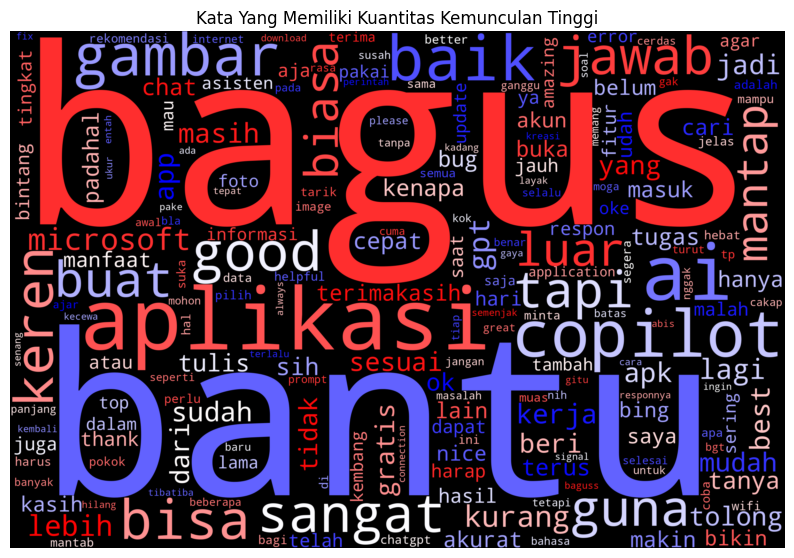

In [39]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

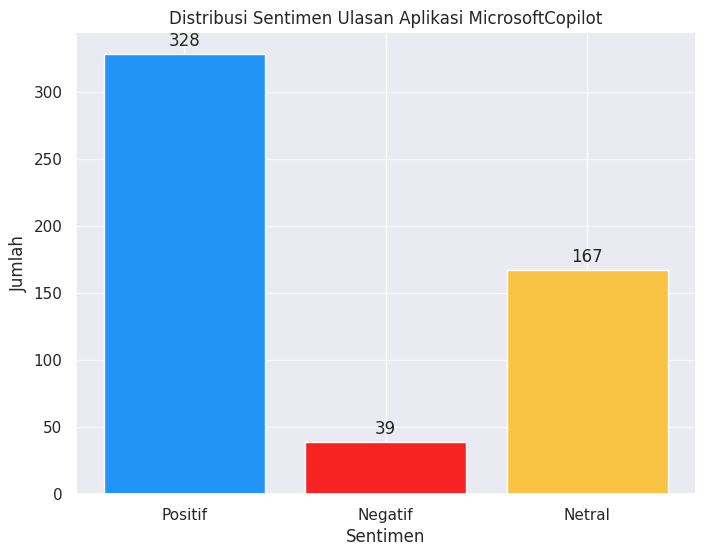

In [40]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ​MicrosoftCopilot")

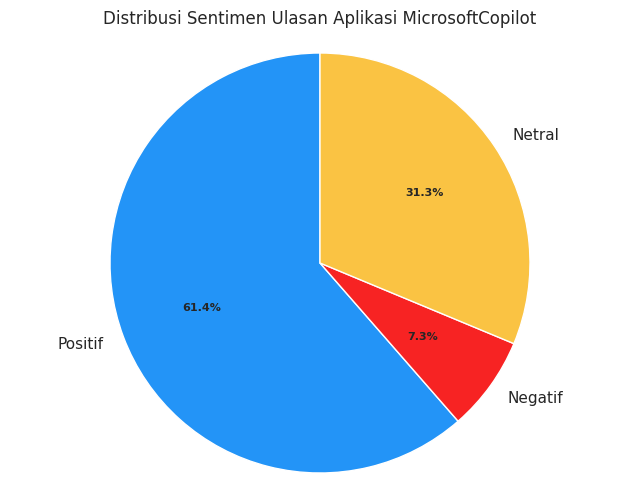

In [41]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ​MicrosoftCopilot")

In [42]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
0,luarbiasa,Amazing.,Positif
1,aplikasi bagus pokok harus coba download yah,Nice app. The principal should try downloading...,Positif
2,aplikasi ai baik turut kenapa kok baik tanpa l...,"fontcolor="" # FFFF00""aigood fontcolor="" # FFFF...",Positif
3,bagus aku ngomong terimakasih aja jawab terima...,Good. I said it. Thank you.,Positif
4,ok,Okay.,Positif
...,...,...,...
528,baik terimakasih,Good. Thank you.,Positif
529,lebih mirip chat gpt ketimbang dahulu bing ai ...,It's more like a gpt chat than it used to be.b...,Positif
531,asisten digital baik dukung oleh ai dari micro...,Digital assistants are good support by ai from...,Positif
532,jauh coba bing edge copilot baik merespon mesk...,. away try bing edge copilot either responds d...,Positif


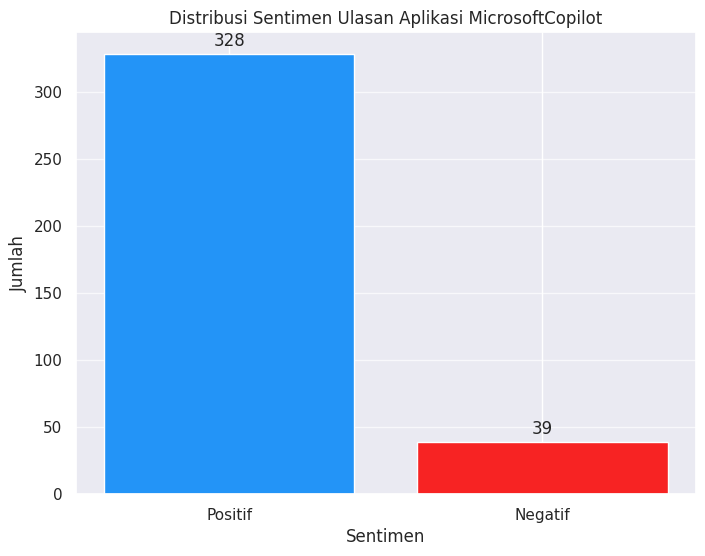

In [43]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ​MicrosoftCopilot")

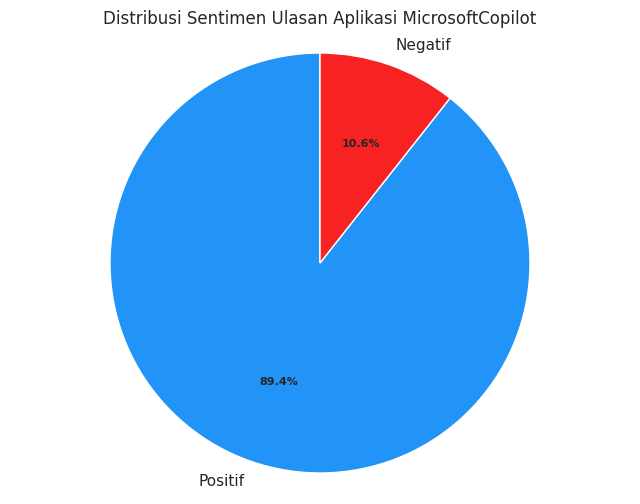

In [44]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi ​MicrosoftCopilot")

In [45]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
0,luarbiasa,Amazing.,0
1,aplikasi bagus pokok harus coba download yah,Nice app. The principal should try downloading...,0
2,aplikasi ai baik turut kenapa kok baik tanpa l...,"fontcolor="" # FFFF00""aigood fontcolor="" # FFFF...",0
3,bagus aku ngomong terimakasih aja jawab terima...,Good. I said it. Thank you.,0
4,ok,Okay.,0
...,...,...,...
528,baik terimakasih,Good. Thank you.,0
529,lebih mirip chat gpt ketimbang dahulu bing ai ...,It's more like a gpt chat than it used to be.b...,0
531,asisten digital baik dukung oleh ai dari micro...,Digital assistants are good support by ai from...,0
532,jauh coba bing edge copilot baik merespon mesk...,. away try bing edge copilot either responds d...,0


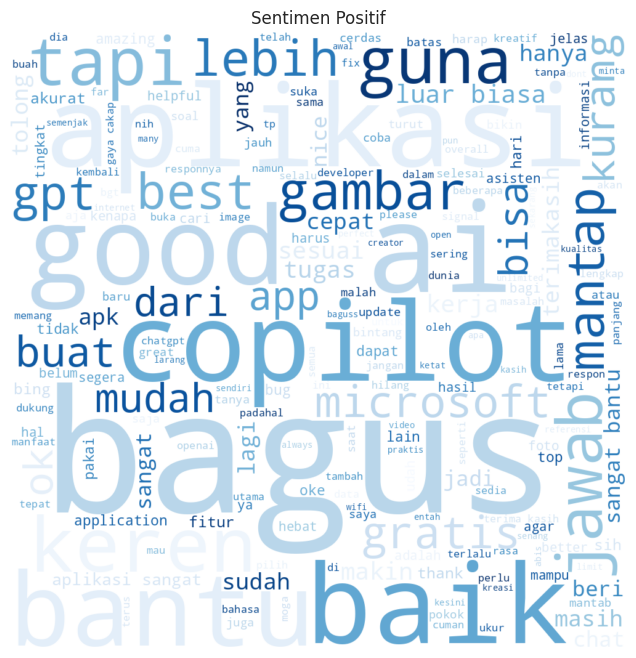

In [46]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

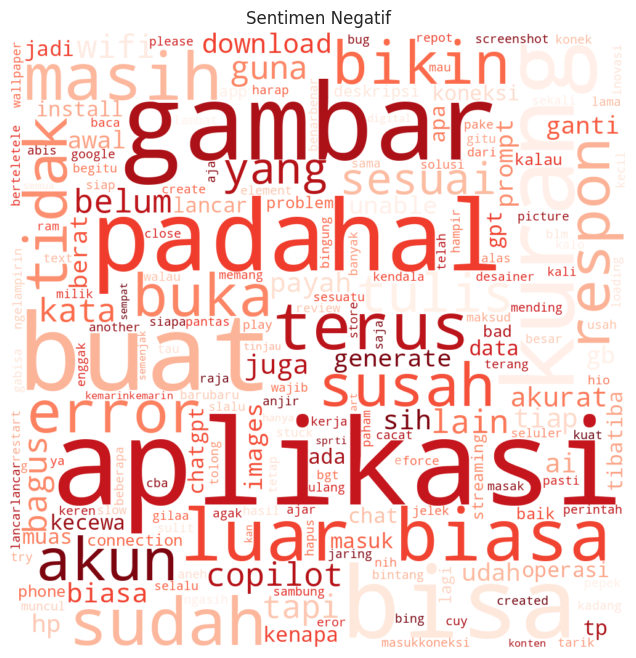

In [47]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

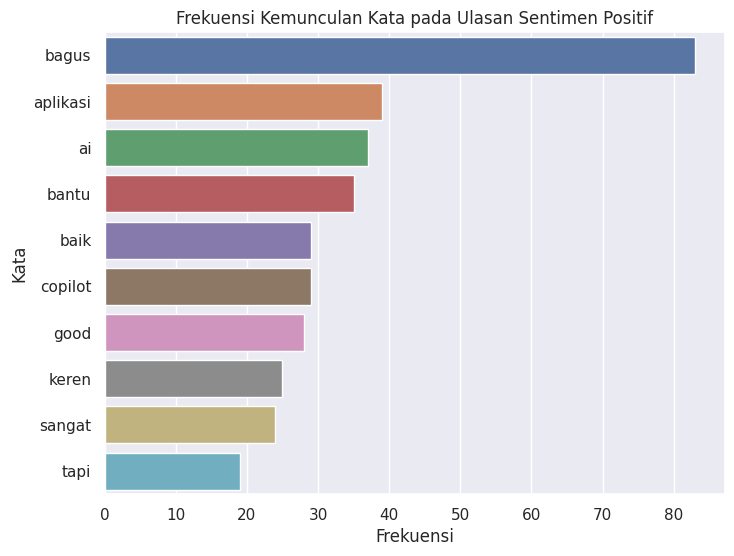

In [48]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [49]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus         83
aplikasi         39
      ai         37
   bantu         35
    baik         29
 copilot         29
    good         28
   keren         25
  sangat         24
    tapi         19


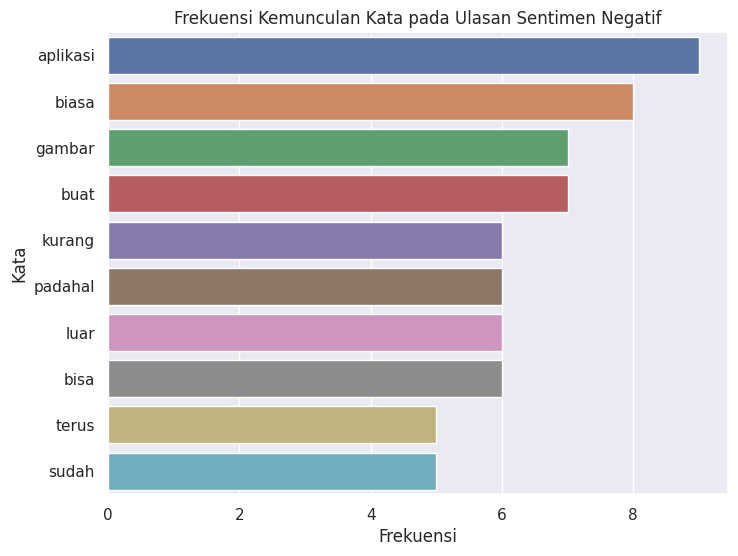

In [50]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [51]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
aplikasi          9
   biasa          8
  gambar          7
    buat          7
  kurang          6
 padahal          6
    luar          6
    bisa          6
   terus          5
   sudah          5


In [52]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,328
1,39


# **Transormation & Data Preparation**

In [53]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [55]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

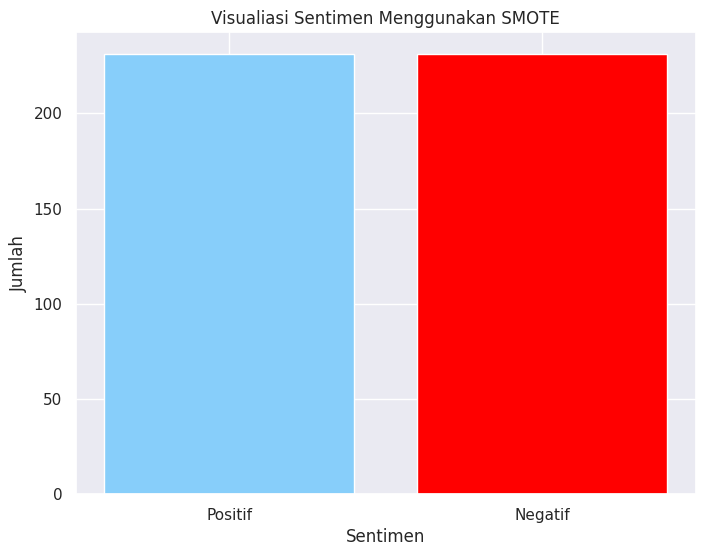

In [56]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [57]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [59]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [60]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8648648648648649

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.94      0.91      0.92        97
     Negatif       0.47      0.57      0.52        14

    accuracy                           0.86       111
   macro avg       0.70      0.74      0.72       111
weighted avg       0.88      0.86      0.87       111



In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[88  9]
 [ 6  8]]

True Positives (TP) =  88

True Negatives (TN) =  8

False Positives (FP) =  9

False Negatives (FN) =  6

Accuracy =  0.8648648648648649


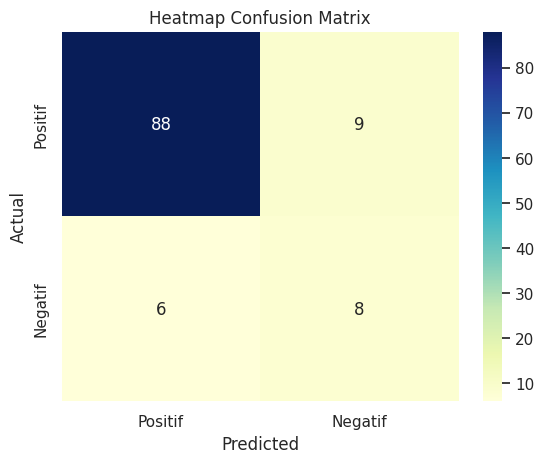

In [62]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [63]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8649


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1351


# **Testing**

In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Kemampuan AI sangat cerdas dan Performanya sangat bagus. Sangat membantu dalam mengerjakan sesuatu terutama untuk hal-hal di dunia pendidikan, dari yang simpel hingga kompleks.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 93.69%
Probabilitas: 93.68739430036467 %


In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Jelek ada tulisan error jaringan wifi tidak tersambung, padahal wifi tidak ada kendala
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 89.36%
Probabilitas: 89.35899669273358 %
